In [1]:
import pandas as pd
import h5py
from pathlib import Path
import seaborn as sns

In [2]:
data_dir = Path('../../data')

## Looking at input data

In [3]:
# This dataset contains 61 cell type markers derived from the IRIS and DMAP datasets plus a custom Treg geneset
bc = pd.read_csv(data_dir / 'bloodCellMarkersIRISDMAP.csv')
bc.shape

(6663, 61)

In [4]:
bc.head()

,IRIS_Bcell-Memory_IgG_IgA,IRIS_Bcell-Memory_IgM,IRIS_Bcell-naive,IRIS_CD4Tcell-N0,IRIS_CD4Tcell-Th1-restimulated12hour,IRIS_CD4Tcell-Th1-restimulated48hour,IRIS_CD4Tcell-Th2-restimulated12hour,IRIS_CD4Tcell-Th2-restimulated48hour,IRIS_CD8Tcell-N0,IRIS_DendriticCell-Control,...,DMAP_PRE_BCELL2,DMAP_PRE_BCELL3,DMAP_TCELLA1,DMAP_TCELLA2,DMAP_TCELLA3,DMAP_TCELLA4,DMAP_TCELLA6,DMAP_TCELLA7,DMAP_TCELLA8,Custom_Treg
GAS6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MMP14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MARCKSL1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPARC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTSD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bc.max().max()

1

In [6]:
bc.sum()

IRIS_Bcell-Memory_IgG_IgA               63
IRIS_Bcell-Memory_IgM                   61
IRIS_Bcell-naive                        70
IRIS_CD4Tcell-N0                        35
IRIS_CD4Tcell-Th1-restimulated12hour    23
                                        ..
DMAP_TCELLA4                            40
DMAP_TCELLA6                            57
DMAP_TCELLA7                            39
DMAP_TCELLA8                            42
Custom_Treg                             13
Length: 61, dtype: int64

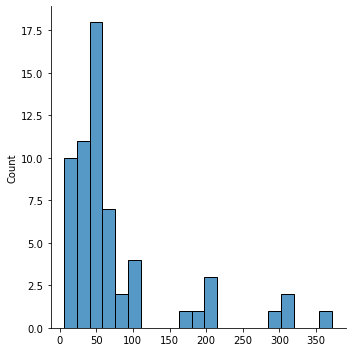

In [7]:
sns.displot(bc.sum())

In [8]:
cp = pd.read_csv(data_dir / 'canonicalPathways.csv')
cp.shape

(6023, 545)

In [9]:
cp.head()

,PID_CASPASE_PATHWAY,PID_P38ALPHABETADOWNSTREAMPATHWAY,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_MITOTIC_PROTEINS,REACTOME_REGULATION_OF_APOPTOSIS,REACTOME_IRON_UPTAKE_AND_TRANSPORT,PID_ERBB1_DOWNSTREAM_PATHWAY,KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION,KEGG_ERBB_SIGNALING_PATHWAY,PID_ERBB1_RECEPTOR_PROXIMAL_PATHWAY,BIOCARTA_PDGF_PATHWAY,...,KEGG_GNRH_SIGNALING_PATHWAY,KEGG_BASAL_TRANSCRIPTION_FACTORS,REACTOME_SYNTHESIS_OF_DNA,KEGG_HEMATOPOIETIC_CELL_LINEAGE,KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY,PID_IL4_2PATHWAY,REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR,PID_BCR_5PATHWAY,PID_TELOMERASEPATHWAY,PID_PI3KPLCTRKPATHWAY
UBE2Q1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UBE2Q2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PMM2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PMM1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cp.max().max()

1

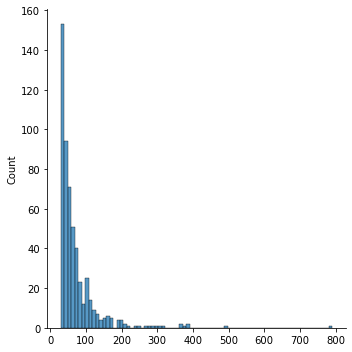

In [11]:
sns.displot(cp.sum())

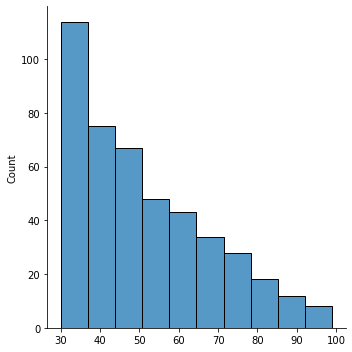

In [12]:
sns.displot(cp.sum()[cp.sum() < 100])

In [13]:
combinedPws = pd.read_csv(data_dir / 'combinedPathways.csv')
combinedPws.shape

(6663, 606)

In [14]:
bc.columns.isin(combinedPws.columns).sum() / len(bc.columns)

1.0

In [15]:
cp.columns.isin(combinedPws.columns).sum() / len(cp.columns)

1.0

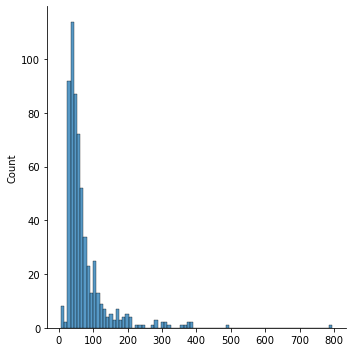

In [16]:
sns.displot(combinedPws.sum())

## CellO data

In [17]:
f = h5py.File(data_dir / 'CellO_data/bulk_RNA_seq_training_set/bulk_log_tpm.h5', 'r')
list(f.keys())

['experiment', 'expression', 'gene_id']

In [18]:
f['experiment'].shape

(4293,)

In [19]:
f['experiment'][:10]

array([b'SRX890545', b'SRX1067711', b'SRX1067710', b'SRX762971',
       b'SRX762970', b'SRX762973', b'SRX762972', b'SRX762975',
       b'SRX762974', b'SRX762977'], dtype='|S10')

In [20]:
f['expression'].shape

(4293, 58243)

In [21]:
f['gene_id'].shape

(58243,)

In [22]:
f['gene_id'][-10:]

array([b'ENSG00000284739', b'ENSG00000284740', b'ENSG00000284741',
       b'ENSG00000284742', b'ENSG00000284743', b'ENSG00000284744',
       b'ENSG00000284745', b'ENSG00000284746', b'ENSG00000284747',
       b'ENSG00000284748'], dtype='|S15')

### Looking at mat4.csv

In [23]:
mat4 = pd.read_csv(data_dir / 'mat4.csv')
mat4.shape

(55904, 4293)

In [24]:
mat4

,SRX890545,SRX1067711,SRX1067710,SRX762971,SRX762970,SRX762973,SRX762972,SRX762975,SRX762974,SRX762977,...,SRX3399303,SRX3399304,SRX3399305,SRX3399306,SRX3399307,SRX3399308,SRX3399309,SRX3399310,SRX3399311,SRX3399312
TSPAN6,0.071963,0.033104,0.233484,0.000000,0.000000,0.000000,0.102932,0.131920,0.232341,0.034728,...,0.042281,0.338865,0.371627,0.583676,0.909566,0.900313,0.317015,0.799190,0.044163,1.064050
TNMD,0.068414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,3.718085,3.743323,3.376271,0.270898,0.000000,1.679924,0.626225,1.564313,1.720021,0.379428,...,3.686067,3.661880,4.096357,3.766411,3.917474,4.034299,3.972622,4.109202,4.007751,3.668019
SCYL3,2.184815,1.990195,1.523096,0.272666,0.153331,0.586564,0.636529,0.605535,1.045735,0.316442,...,2.326043,2.357105,2.936465,2.712422,2.744322,2.548069,2.634532,2.661645,2.015217,2.255745
C1orf112,1.490935,1.780348,0.611052,0.046180,0.029985,0.075667,0.060057,0.136639,0.213615,0.011401,...,1.636744,1.464241,3.026844,2.494577,1.895236,1.914284,2.009371,2.445280,1.989733,2.194389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTD-2331H12.9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-122G18.12,1.208610,0.647963,0.697612,0.751671,0.520262,0.915725,1.107029,0.726533,1.271407,0.627059,...,0.858695,1.825129,1.387390,0.953148,1.342535,0.976151,1.115170,0.698829,1.192115,0.810953
RP5-937E21.8,0.086928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715472,0.482831
RP11-606M12.1,0.149827,0.000000,0.306894,0.000000,0.000000,0.000000,0.204761,0.062334,0.000000,0.291815,...,0.138795,0.644069,0.404581,0.299244,0.123563,0.455072,0.386765,0.148570,0.605566,0.157699


In [25]:
mat4.mean().shape

(4293,)

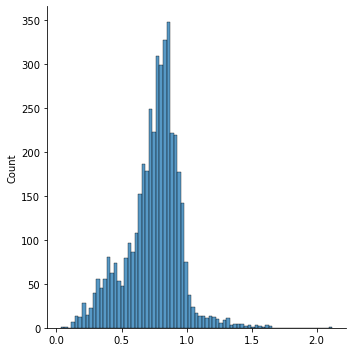

In [26]:
sns.displot(mat4.mean())

In [30]:
import sys
sys.path.append('../../onto_lib')

In [31]:
from anndata import AnnData
import scanpy as sc
import json
import general_ontology_tools as got

Unable to import pygraphviz. Visualization is disabled.
Loading ontology from ../../onto_lib\obo\DOID.17-01-30.obo ...
Loading ontology from ../../onto_lib\obo\UBERON.17-01-30.obo ...
Loading ontology from ../../onto_lib\obo\CL.18-11-13.obo ...
Loading ontology from ../../onto_lib\obo\CVCL.17-01-30.obo ...
Loading ontology from ../../onto_lib\obo\EFO.17-01-30.obo ...


In [32]:
with open(data_dir / 'CellO_data/bulk_RNA_seq_training_set/bulk_labels.json', 'r') as f:
    labels_data = json.load(f)
    
sample_to_cell_types = labels_data #labels_data['labels']

In [35]:
# Add cell type annotations to AnnData object
ad = AnnData(mat4.transpose())

In [36]:
# Gather all of the cell types
all_cell_types = set()
for cts in sample_to_cell_types.values():
    all_cell_types.update([got.get_term_name(x) for x in cts])

In [38]:
cts_per_samples = [
    set(map(got.get_term_name, sample_to_cell_types[sample]))
    for sample in ad.obs.index
]

In [39]:

for ct in all_cell_types:
    is_cell_type = [
        str(bool(ct in cts_in_sample)) for cts_in_sample in cts_per_samples
    ]
    ad.obs[ct] = is_cell_type

In [40]:
# Compute UMAP
sc.pp.pca(ad)
sc.pp.neighbors(ad)
sc.tl.umap(ad)

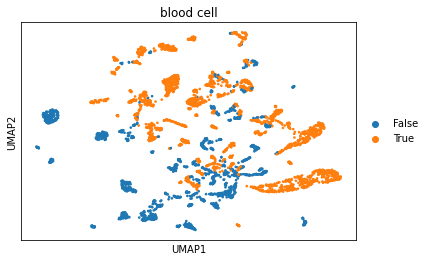

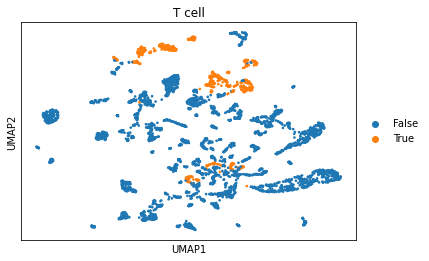

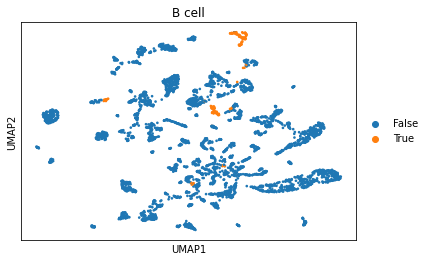

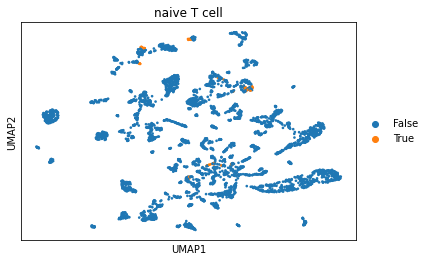

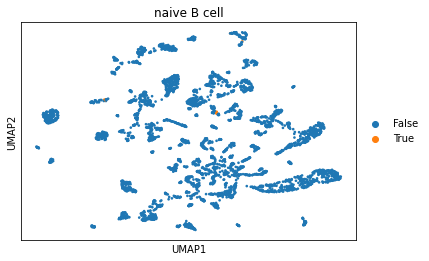

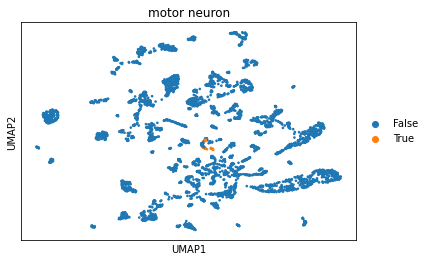

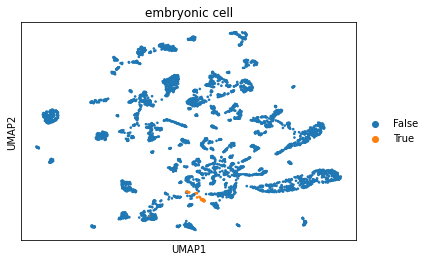

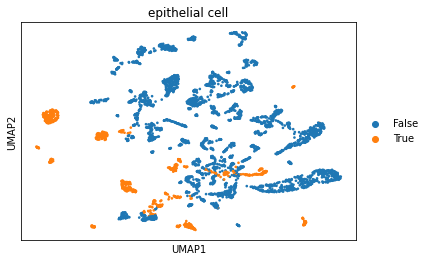

In [42]:
sc.pl.umap(ad, color='blood cell')
sc.pl.umap(ad, color='T cell')
sc.pl.umap(ad, color='B cell')
sc.pl.umap(ad, color='naive T cell')
sc.pl.umap(ad, color='naive B cell')
sc.pl.umap(ad, color='motor neuron')
sc.pl.umap(ad, color='embryonic cell')
sc.pl.umap(ad, color='epithelial cell')

## Looking at B matrix produced by PLIER

In [16]:
B_df = pd.read_csv(data_dir / 'plierResult/B.csv')
B_df.shape

(258, 4293)